# Cleaning up wage_offer_from

wage offer from is represented in two columns wage_offer_from_9089 and wage_offered_from_9089. These both columns must be merged in order to work with them.

In [49]:
import pandas as pd
import importlib
import modules
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_list= ["wage_offer_from_9089", "wage_offered_from_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_from_9089,wage_offered_from_9089
0,75629,NaN
1,37024,NaN
2,47923,NaN
3,10.97,NaN
4,100000,NaN


In [4]:
visas_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

wage_offered_from_9089 was sucessfully imported as float. 
However we'll have to take a closer look at wage_offer_from_9089 to convert it to a float value.

Next, we'll take a closer look how the values in these two columns are distributed. 
We defined a new function in our modules library to deal with this task. 

wage_offer_from_9089
259591/374362 69%
Filled: |██████████████████████████████████----------------| 69.3% Rows


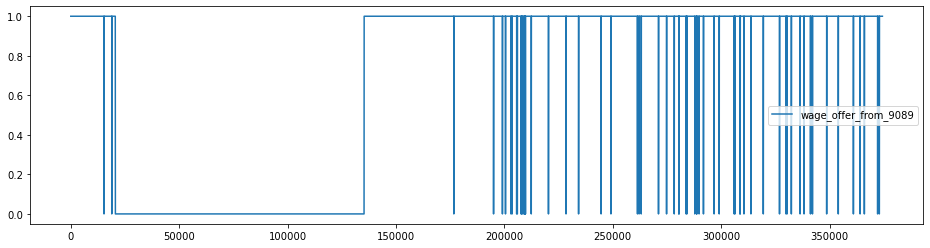


wage_offered_from_9089
114647/374362 31%
Filled: |███████████████-----------------------------------| 30.6% Rows


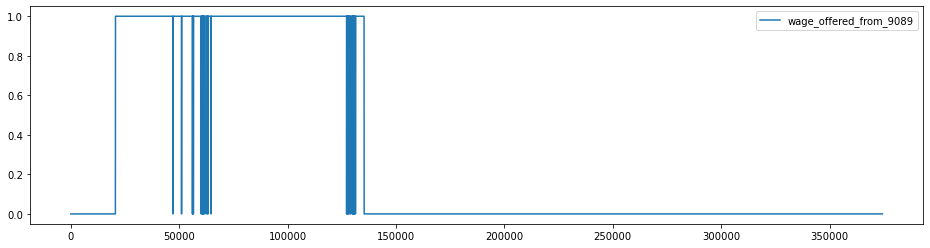

In [5]:
modules.print_count_of_values_relation(visas_df, True, True)

To explain the resulting graphs: 
The X-Axis shows the index of all values. We have over 350000 values (rows) in our dataset.
The Y-Axis shows if a row is filled with a actual value. Not NaN Values are displayed as 1, NaN values are displayed as 0. 

It becomes aparent that both columnscomplete each other. Gaps in wage_offer_from_9098 can be filled with wage_offer_from_9098.

----
## Cleaning up `wage_offer_from_9089`

In Progress of our data analysis it became apparent, that wage_offer_from_9089 has to be cleaned up, before analyzing the contained data. 

In [6]:
cleanup_df = visas_df.copy()
cleanup_df.dtypes

wage_offer_from_9089       object
wage_offered_from_9089    float64
dtype: object

Originally all the imported rows were recognized as "object". But the values should be converted to float values.

In [7]:
# cleanup_df["wage_offer_from_9089"].astype('float')

First, we tried to convert the data, by applying the new type.

In [8]:
cleanup_df["wage_offer_from_9089"].apply(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
374357      <class 'str'>
374358      <class 'str'>
374359      <class 'str'>
374360      <class 'str'>
374361      <class 'str'>
Name: wage_offer_from_9089, Length: 374362, dtype: object

We defined a new columnn, containing the types of all newly converted values.

In [9]:
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [10]:

cleanup_df.head()

,wage_offer_from_9089,wage_offered_from_9089,wage_Type
0,75629,NaN,float
1,37024,NaN,float
2,47923,NaN,float
3,10.97,NaN,float
4,100000,NaN,float


In [11]:
import modules

In [12]:
importlib.reload(modules)
modules.print_full(cleanup_df.sample(100))

       wage_offer_from_9089  wage_offered_from_9089 wage_Type
6963                  81099                     NaN     float
293236                86424                     NaN     float
153732            81,765.00                     NaN       str
205265            67,000.00                     NaN       str
361461           100,110.00                     NaN       str
193383           108,805.00                     NaN       str
122045                  NaN                76710.00     float
131331                  NaN                    9.00     float
93807                   NaN                80000.00     float
355631            83,096.00                     NaN       str
272745                28205                     NaN     float
144983           158,725.00                     NaN       str
373102            67,900.00                     NaN       str
349693           100,482.00                     NaN       str
234247               133661                     NaN     float
43310   

It became apparent, that apllying the new type was partially successful. But values containing delimiters or seperators are still recognized as a string. 

In [13]:

cleanup_df['wage_Type'].value_counts()

float    258181
str      116181
Name: wage_Type, dtype: int64

We defined a new function to remove the delimiters. Additionally we replaced the '#############' values, which occured two times, with NaN. 

In [14]:
def clean_currency(x):
    """ If the value is a string, then remove delimiters
    otherwise, the value is numeric and can be converted.

    """
    if isinstance(x, str):
        if x == '#############':
            x = np.nan
        else:
            return(x.replace(',', ''))
    return(x)

In [15]:
cleanup_df["wage_offer_from_9089"] = cleanup_df["wage_offer_from_9089"].apply(clean_currency).astype('float')
cleanup_df['wage_Type'] = cleanup_df["wage_offer_from_9089"].apply(lambda x: type(x).__name__)

In [16]:

cleanup_df['wage_Type'].value_counts()

float    374362
Name: wage_Type, dtype: int64

In [17]:

modules.print_full(cleanup_df.sample(100))

        wage_offer_from_9089  wage_offered_from_9089 wage_Type
279041              82000.00                     NaN     float
242948             110000.00                     NaN     float
340546             106912.00                     NaN     float
279481              86182.00                     NaN     float
66232                    NaN                 86986.0     float
46889                    NaN                 87714.0     float
241242              75234.00                     NaN     float
271830              95000.00                     NaN     float
119698                   NaN                113000.0     float
212500             110000.00                     NaN     float
98684                    NaN                103200.0     float
240796                  8.09                     NaN     float
205350              69700.00                     NaN     float
113075                   NaN                100298.0     float
122313                   NaN                144206.0   

Perfect, all values are now converted to float. The column `wage_offer_from_9089` was successfully cleaned up.

In [18]:
cleanup_df['wage_offer_from_9089'].median()

91104.0

In [19]:
visas_df['wage_offer_from_9089'] = cleanup_df['wage_offer_from_9089']
del cleanup_df

In [20]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089
83015,NaN,87547.0
260052,96000.0,NaN
226802,75005.0,NaN
48681,NaN,95000.0
296126,82000.0,NaN
167378,91166.0,NaN
220434,37773.0,NaN
234073,108763.0,NaN
191807,69742.0,NaN
283797,110000.0,NaN


## Merging both columns

All NaN values wil lbe filled with 0 in order to sum both columns up.
We saw earlier thar both columns never overlap.

In [21]:
visas_df['wage_offer_merged'] = visas_df['wage_offer_from_9089'].fillna(0) + visas_df['wage_offered_from_9089'].fillna(0)

In [22]:
visas_df.sample(15)

,wage_offer_from_9089,wage_offered_from_9089,wage_offer_merged
230301,63378.00,NaN,63378.00
304890,25.36,NaN,25.36
152443,40477.00,NaN,40477.00
252997,105518.00,NaN,105518.00
195049,122718.00,NaN,122718.00
286095,160000.00,NaN,160000.00
164226,72467.00,NaN,72467.00
223157,76950.00,NaN,76950.00
238154,95300.00,NaN,95300.00
91252,NaN,102315.0,102315.00


In [23]:
visas_df['wage_offer_merged'].dtype

dtype('float64')

In [24]:
(visas_df['wage_offer_merged'] == 0).sum()

126

We filled NaN values with 0 in Order to calculate sums. Now we will replaye 0 with NaN to keep the columns cleaned up.
Additionally a wage of 0 would be unrealistic.

In [25]:
visas_df['wage_offer_merged'].replace(0, np.nan, inplace=True)

In [26]:
(visas_df['wage_offer_merged'] == 0).sum()

0

In [27]:
visas_df['wage_offer_merged'].median()
clean_df = pd.DataFrame()
clean_df['wage_offer_merged'] = visas_df['wage_offer_merged']

In [28]:
clean_df.head()


,wage_offer_merged
0,75629.00
1,37024.00
2,47923.00
3,10.97
4,100000.00


---
# Cleaning up wage_offer_unit

In [29]:
col_list= ["wage_offer_unit_of_pay_9089", "wage_offered_unit_of_pay_9089"]
visas_df = pd.read_csv("data/us_perm_visas.csv", usecols=col_list)
visas_df.head ()

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
0,yr,NaN
1,yr,NaN
2,yr,NaN
3,hr,NaN
4,yr,NaN


In [30]:
visas_df.sample(50)

,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089
284200,Year,NaN
141283,Year,NaN
323702,Year,NaN
204529,Year,NaN
124205,NaN,Year
283943,Year,NaN
238897,Year,NaN
21808,NaN,NaN
44618,NaN,NaN
146576,Year,NaN


In [31]:
visas_df['wage_offer_unit_of_pay_9089'].value_counts()

Year         230591
yr            19733
Hour           7038
hr              781
Week            142
Month            81
wk               30
mth              21
Bi-Weekly        20
bi                9
Name: wage_offer_unit_of_pay_9089, dtype: int64

In [32]:
visas_df['wage_offered_unit_of_pay_9089'].value_counts()

Year         68950
Hour          1651
Week            58
Month           39
Bi-Weekly        1
Name: wage_offered_unit_of_pay_9089, dtype: int64

wage_offer_unit_of_pay_9089 has to be cleaned. We'll deal with this issue after the merge. 

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows


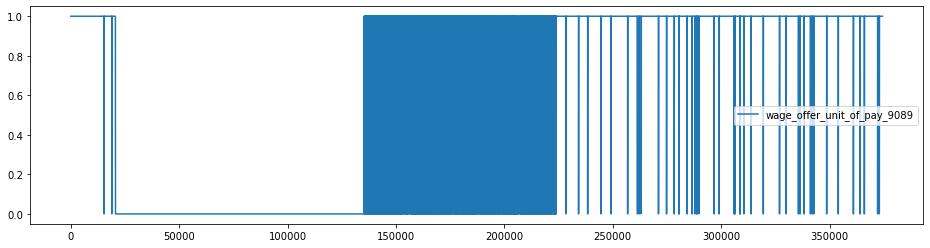


wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows


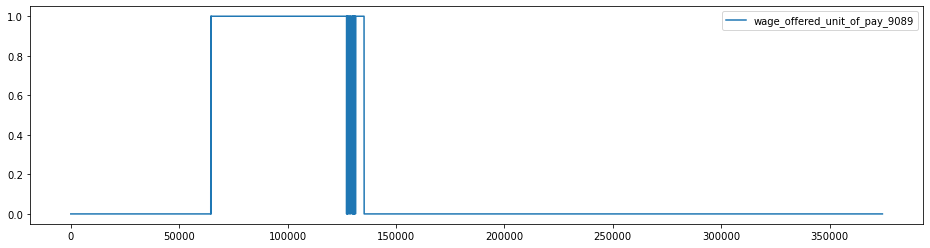

In [33]:
modules.print_count_of_values_relation(visas_df, True, True)

The dristribution of values reveals a problem. Between an index of 25.000 and 75.000 or dataset contains no value for the unit of pay.

We will merge the both columns and take a closer look at the values they are containing.

In [34]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_of_pay_9089'].fillna('') + visas_df['wage_offered_unit_of_pay_9089'].fillna('')

In [35]:
visas_df['wage_offer_unit_merged'].replace('', np.nan, inplace=True)

In [36]:
visas_df['wage_offer_unit_merged'].value_counts()

Year         299541
yr            19733
Hour           8689
hr              781
Week            200
Month           120
wk               30
mth              21
Bi-Weekly        21
bi                9
Name: wage_offer_unit_merged, dtype: int64

In [37]:
unit_abbreviations = {
  "Year": "yr",
  "Month": "mth",
  "Bi-Weekly": "bi",
  "Week": "wk",
  "Hour": "hr"
}

In [38]:
visas_df['wage_offer_unit_merged'] = visas_df['wage_offer_unit_merged'].replace(unit_abbreviations)

In [39]:
visas_df['wage_offer_unit_merged'].value_counts()

yr     319274
hr       9470
wk        230
mth       141
bi         30
Name: wage_offer_unit_merged, dtype: int64

wage_offer_unit_of_pay_9089
258446/374362 69%
Filled: |██████████████████████████████████----------------| 69.0% Rows


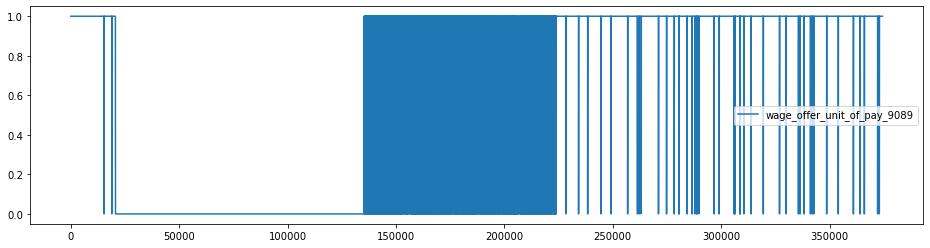


wage_offered_unit_of_pay_9089
70699/374362 19%
Filled: |█████████-----------------------------------------| 18.9% Rows


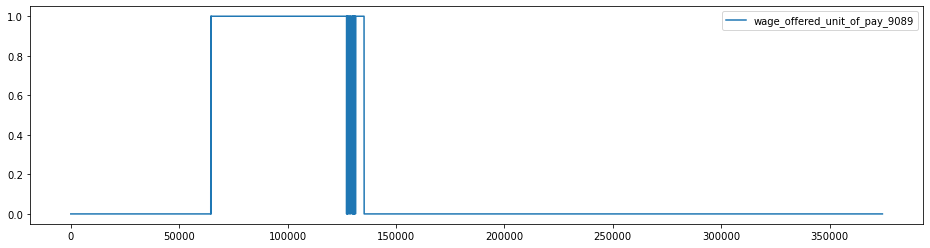


wage_offer_unit_merged
329145/374362 88%
Filled: |███████████████████████████████████████████-------| 87.9% Rows


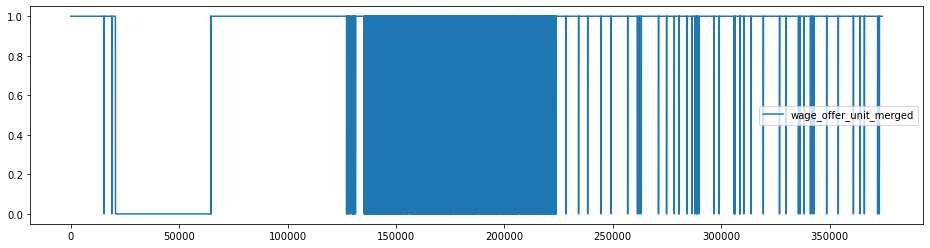

In [40]:

modules.print_count_of_values_relation(visas_df, True, True)

The gap remains, considering the gap is realtively small and we have lot's of values, we'll ignore the gap in the further analysis.


In [41]:
clean_df['wage_offer_unit'] = visas_df['wage_offer_unit_merged']

In [42]:

clean_df.head()

,wage_offer_merged,wage_offer_unit
0,75629.00,yr
1,37024.00,yr
2,47923.00,yr
3,10.97,hr
4,100000.00,yr


In [43]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().sort_values()

wage_offer_unit
hr       221.303376
bi      1634.519655
mth     9005.593357
wk     11315.946130
yr     96487.857970
Name: wage_offer_merged, dtype: float64

In [44]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].describe())

                    count          mean           std      min       25%  \
wage_offer_unit                                                            
bi                   29.0   1634.519655   1800.303267     8.00    620.00   
hr                 9464.0    221.303376   4614.520453     6.55      8.91   
mth                 140.0   9005.593357  16935.140095   800.00   2837.50   
wk                  230.0  11315.946130  32412.952643     1.00    420.25   
yr               319266.0  96487.857970  82671.176121  2200.60  74402.00   

                     50%          75%         max  
wage_offer_unit                                    
bi                1360.0    1920.0000     10000.0  
hr                  11.6      34.0000    188000.0  
mth               5000.0    7785.3350    141000.0  
wk                 800.0    1788.4675    224000.0  
yr               92664.0  114192.0000  13285000.0  


In [45]:

modules.print_full(clean_df.groupby('wage_offer_unit')['wage_offer_merged'].nlargest(10))

wage_offer_unit        
bi               18837        10000.00
                 281821        2992.33
                 338278        2500.00
                 372923        2500.00
                 17802         2134.50
                 264059        2115.38
                 3577          2000.00
                 260057        1920.00
                 348020        1870.00
                 358656        1870.00
hr               349488      188000.00
                 17630       158828.80
                 276889      135637.00
                 107163      134534.00
                 270788      115795.00
                 271939      115795.00
                 274251      115795.00
                 134072      106080.00
                 250626      105000.00
                 9219         86070.00
mth              331286      141000.00
                 227399      115149.00
                 233941       80000.00
                 230390       45000.00
                 130654       28746.00
 

In [ ]:
clean_df.groupby('wage_offer_unit')['wage_offer_merged'].mean().plot()
plt.legend(loc="upper left")
plt.show()

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

In [ ]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [ ]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [ ]:
clean_df.dtypes

In [ ]:
new_df["wage_offer_unit"].size

In [ ]:
new_df.value_counts()

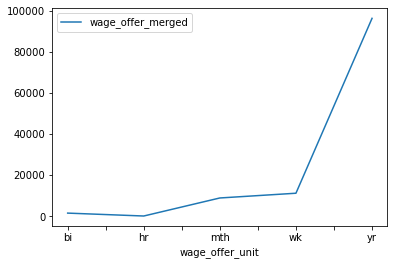

This is unexpected. It was expeced, that hr > week > bi > mth > yr.
Anyway we'll leave all units besides yr unseen and concentrate on yr, which has the most occurences.

<AxesSubplot:ylabel='wage_offer_unit'>

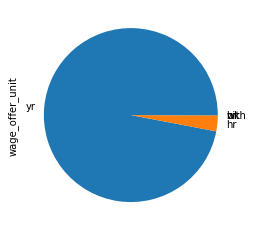

In [63]:
clean_df['wage_offer_unit'].value_counts().plot(kind='pie')

Filter all not yr values

In [75]:
new_df = clean_df[clean_df["wage_offer_unit"].str.contains("yr", na=False)]

In [76]:
clean_df.dtypes

wage_offer_merged    float64
wage_offer_unit       object
dtype: object

In [79]:
new_df["wage_offer_unit"].size

319274

In [78]:
new_df.value_counts()

wage_offer_merged  wage_offer_unit
90000.00           yr                 3499
110000.00          yr                 3041
100000.00          yr                 3038
120000.00          yr                 3015
72467.00           yr                 2839
                                      ... 
105487.00          yr                    1
105489.00          yr                    1
105494.00          yr                    1
105499.89          yr                    1
2200.60            yr                    1
Length: 32662, dtype: int64